<a href="https://colab.research.google.com/github/BrianGisemba/MENTAL-HEALTH-TWEETS-CLASSIFICATION/blob/data_cleaning/Data_Cleaning_%26_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

## a) Define the question

Using data scrapped from twitter on the different Mental Health disorders to check the main mental health disorders Kenyans tweet about.

## b) Metrics for success

Building models using SVM, Multinomial Naive Bayes & BERT. Deploying models on WandB and using Streamlit for our deployment strategy.

## c) Understanding the context

On June 12th 2021, Dr. Lydia Wahura committed suicide in her car after leaving an ongoing class at University of Nairobi. This shed a light on the ongoing mental health crisis in the country.  A World Health Organization report released recently ranked Kenya position five among African countries with the highest number of depression cases. 

Kenya has a culture of denial in mental health issues, which only serves to make things worse. The pandemic has had a substantial negative impact on mental health. However, there is still no formal mental health response plan, with the state only declaring its commitment to mental health. The lack of a formal mental health response plan is largely influenced by the assumption that other diseases make up the biggest threats in the country, which is increasingly becoming a fallacy, if the statistics on the causes of death in the nation are anything to go by.

We would like to find out the main disorders that Kenyans are currently struggling with, based on their conversations on twitter. We will scrape data from Kenyan twitter users and do classification between the different mental health disorders.


## d) Recording the experimental design

The following steps will be followed during this exercise:
- Data Understanding
- Data Preparation
- Data Cleaning 
- Perform EDA
- Data Pre-processing
- Modelling
- Evaluation
- Challenging the solution

# Data Preparation

## Importing the libraries

In [115]:
# Load the libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading data

In [116]:
# Loading 'depression' dataset into our notebook
depression = pd.read_csv('/content/depression.csv')
depression['disorder'] = 'depression'
depression.head(5)

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,TheKenyanPost,SHOCK as a young man climbs on top of a hospit...,"Nairobi, Kenya","News, Politics, Entertainment, Gossip, Feature...",434,52951,356584,2021-08-17 10:33:55,0,[],depression
1,1,Goodguy_254,People tend to hide depression under drinking ...,"Nairobi, Kenya",poet\n writer🧾\nsoftware developer🖥️\n program...,2074,2257,1284,2021-08-17 10:20:30,0,[],depression
2,2,AlfredLete,@Lily_nganga Depression,Nairobi,"do what is right,not what is easy",8515,13075,37974,2021-08-17 09:32:49,0,[],depression
3,3,GeraldNgaoPk7,Itumbi has subjected bloggers in to depression...,"Nairobi, Kenya",Pan-Africanist||NeoMarxistRevolutionary||Inter...,21503,20437,164694,2021-08-17 08:56:26,2,"[{'text': 'ItumbiGhostWorkers', 'indices': [77...",depression
4,4,swyma304,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",Psychiatry Resident. Certified Cognitive Behav...,93,206,594,2021-08-17 08:18:20,1,[],depression


In [117]:
# Loading 'anxiety' dataset into our notebook
anxiety = pd.read_csv('/content/anxiety.csv')
anxiety['disorder'] = 'anxiety'
anxiety.head(5)

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,wamvii,Today anxiety has decided I am le bich.,"Nairobi, Kenya",arteest,43,333,3397,2021-08-17 10:09:22,0,[],anxiety
1,1,joy_flo,@mikewachira Oh I'd be a whole different perso...,"Kenya, Nairobi",Wish I had the gumption to tweet recklessly :/,297,304,16849,2021-08-17 09:06:52,0,[],anxiety
2,2,swyma304,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",Psychiatry Resident. Certified Cognitive Behav...,93,206,594,2021-08-17 08:18:20,1,[],anxiety
3,3,giluih,"@MishBosslady__ I have been there, I relied in...","Nairobi, Kenya","A fit mom,a designer,sanguine,a freelancer,a V...",4703,2968,3539,2021-08-17 08:11:42,0,[],anxiety
4,4,progirlsnation,* Learn your triggers.\n* Talk about your expe...,"Nairobi, Kenya",Impact • Empower • Educate | Help us raise awa...,12,37,306,2021-08-17 08:00:04,0,[],anxiety


In [118]:
# Loading 'paranoia' dataset into our notebook
paranoia = pd.read_csv('/content/paranoia.csv')
paranoia['disorder'] = 'paranoia'
paranoia.head(5)

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,_Wachagah,"I lost a friend to abuse, paranoia hit until h...","Nairobi, Kenya",*||SBNR||*,1933,1947,2250,2021-08-15 16:09:09,2,[],paranoia
1,1,comradefyat,Weed paranoia is real. Anybody who has ever go...,"Nairobi, Kenya",Funnier than most😂✌️...posting random thoughts...,2671,78884,97606,2021-08-15 15:58:38,23,[],paranoia
2,2,mozdic65,Nuclear Power Generation-\n#NextGen -Modularit...,"Nairobi, Kenya","Avid reader,Polymath.Patriotic Kenyan,Liberal ...",4724,2869,16801,2021-08-15 12:55:33,2,"[{'text': 'NextGen', 'indices': [26, 34]}]",paranoia
3,3,realRIZE_254,"Regardless of the cash payoff, I can't ever gl...","Nairobi, Kenya",P. Kariûki Thande\n Recording Artist; Songwrit...,263,445,4878,2021-08-15 08:48:17,0,[],paranoia
4,4,Mwendi254,@NimuKiarie Imagine having anxiety issues then...,"Nairobi, Kenya",Economist / Sociologist / Political Analyst.\...,1408,534,5240,2021-08-14 21:00:46,0,[],paranoia


In [119]:
# Loading 'schizophrenia' dataset into our notebook
schizophrenia = pd.read_csv('/content/schizophrenia.csv')
schizophrenia['disorder'] = 'schizophrenia'
schizophrenia.head(5)

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,FlorentineWama4,@CaxstonePKigata The mandazi fuhrer is afflict...,"Nairobi, Kenya",Haki iwe ngao na mlinzi,128,119,1265,2021-08-17 03:17:58,0,[],schizophrenia
1,1,realeconomistKE,@Psalm_II @ShambaLaNyama @Lomayani_ @LadenKip ...,"Nairobi, Kenya","Writer, father, economist, and peace loving Ke...",3136,1414,717,2021-08-16 15:03:03,0,[],schizophrenia
2,2,iankiplangat4,@ChiromoHospGrp @HawahKone @leujonson @benson_...,Nairobi,NaN,173,65,206,2021-08-16 07:52:59,3,[],schizophrenia
3,3,MsJ73363625,schizophrenia is a mental disorder where a pat...,"Nairobi, Kenya",Counseling Psychologist and a pasionate writer,12,9,55,2021-08-16 04:51:12,0,[],schizophrenia
4,4,_BelleSamira,If you're genetically predisposed to schizophr...,"Nairobi, Kenya",Committed Hedonist. Girl and the World. \n\nSk...,304,2296,57665,2021-08-15 23:23:41,0,[],schizophrenia


In [120]:
# Loading 'dementia' dataset into our notebook
dementia = pd.read_csv('/content/dementia.csv')
dementia['disorder'] = 'dementia'
dementia.head(5)

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,rajivshori,Dementia: The ‘single most important’ food to ...,"Nairobi, Kenya","Medic, Mental health professional and Mediator...",155,114,8043,2021-08-16 02:09:15,0,[],dementia
1,1,Mjames55652812,The slow walking dementia patient is just doin...,Naivasha.,Entrepreneur.\nSic Transit Gloria Mundi.,134,107,5172,2021-08-15 16:32:33,0,[],dementia
2,2,linevadventure,Adrenaline is wonderful. It covers pain. It co...,"Nairobi, Kenya",Linev Adventures is a full service ground and ...,1,1,3,2021-08-15 15:10:03,0,[],dementia
3,3,EnziPascal,Problems of being OBESE\n\n- Brain injury: Mem...,"Nairobi,Kenya",Create⏩Explore⏩Expand⏩Conquer,493,157,99,2021-08-15 10:03:45,0,[],dementia
4,4,Beverlyne__,Why do I have the sex drive of an 80 year old ...,"Nairobi, Kenya",Spread love and kindness 💕.\nIntern @wakenyaaw...,1061,1775,19213,2021-08-15 06:56:15,0,[],dementia


In [121]:
# Loading 'bipolar' dataset into our notebook
bipolar = pd.read_csv('/content/bipolar.csv')
bipolar['disorder'] = 'bipolar'
bipolar.head(5)

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,haofuwei,@ke_skimpyy @allak_weda @patchyplacing @Ration...,Nairobi,Cultural critic.,1086,1619,2185,2021-08-16 17:06:29,0,[],bipolar
1,1,jos_zena,This bipolar weather is quite annoying. Yaani ...,"Nairobi ,Kenya.",IG @zena_jos,741,141,1357,2021-08-16 10:12:38,0,[],bipolar
2,2,iankiplangat4,@ChiromoHospGrp @HawahKone @leujonson @benson_...,Nairobi,NaN,173,65,206,2021-08-16 07:52:59,3,[],bipolar
3,3,WanjiruMajor,@MwalimChurchill @ntvkenya @Rachelshebesh Ment...,"Nairobi, Kenya","I know the Secret!! My Thoughts, My World.",474,310,1780,2021-08-15 18:07:05,0,[],bipolar
4,4,chegewagithinji,Bruh this weather bipolar af😩,"Kabete, Kenya",Car Hire services || Aviation Geek #A380 #A350...,805,2220,63612,2021-08-15 06:13:42,0,[],bipolar


In [122]:
# Loading 'suicidal' dataset into our notebook
suicidal = pd.read_csv('/content/suicidal.csv')
suicidal['disorder'] = 'suicidal'
suicidal.head(5)

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,BaleMpya,Daring a suicidal person to jump is the lowest...,"Kajiado, Kenya",Interior Design | Finance Assistant | Top Tier...,517,1026,29857,2021-08-17 05:39:57,1,[],suicidal
1,1,Queen_Maureen1,@AchiengBlack It's because they know what it f...,"Nairobi, Kenya",It's Never that Serious 😍• Youth Ambassador• I...,3915,43038,35355,2021-08-17 05:20:39,0,[],suicidal
2,2,iamlegitdaily,How do you tell a suicidal person on the roof ...,Kenya 🇰🇪,Digital Media | Lifestyle | Showbiz | Conversa...,665,51339,100948,2021-08-17 05:17:23,0,[],suicidal
3,3,dankiptoo7,@ken_rende I'm watching probable suicides here...,"Nakuru, Kenya","Lover of whats great,spicy,unique and full of ...",682,683,886,2021-08-16 17:17:20,0,[],suicidal
4,4,whizcomp,"@khilanii I was suicidal , the day I healed I ...",Bomet kenya,javascript,359,69,712,2021-08-16 16:01:08,0,[],suicidal


In [123]:
# Loading 'autism' dataset into our notebook
autism = pd.read_csv('/content/autism.csv')
autism['disorder'] = 'autism'
autism.head(5)

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,viru5detected,I have autism and ADHD. I can't pay attention ...,"Nairobi, Kenya",That fattie on a bicycle | Petticoated Swashbu...,1270,5509,158117,2021-08-16 12:31:37,0,[],autism
1,1,viru5detected,Perhaps I do something about my autism and ADHD,"Nairobi, Kenya",That fattie on a bicycle | Petticoated Swashbu...,1270,5509,158117,2021-08-16 12:16:34,0,[],autism
2,2,HopekidHk,Bless those who see life through a different w...,NAIROBI KENYA,"WATCH #KOO_KOO ON YOUTUBE. 👇👇👇👇👇SMS ""skiza 639...",231,32994,38893,2021-08-15 19:19:36,0,[],autism
3,3,thee_lovechild,I’ve always wondered what happens to children ...,"Nairobi, Kenya","QueenMufasa 👑 Body positivity activist ,Fashio...",434,1324,7557,2021-08-15 18:04:26,0,[],autism
4,4,Brendaotin,@ArapTilingi @Kokwet_KE Didn't you say mental ...,"Nairobi, Kenya",Physicist|CCNA|FullStack Developer|Techie |Gui...,289,148,1828,2021-08-14 09:00:24,0,[],autism


In [124]:
# Concatenating our datasets into one dataset

mentalhealth_df = pd.concat([depression, autism, anxiety, paranoia, schizophrenia, suicidal, dementia, bipolar], axis = 0)
mentalhealth_df

,Unnamed: 0,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,TheKenyanPost,SHOCK as a young man climbs on top of a hospit...,"Nairobi, Kenya","News, Politics, Entertainment, Gossip, Feature...",434,52951,356584,2021-08-17 10:33:55,0,[],depression
1,1,Goodguy_254,People tend to hide depression under drinking ...,"Nairobi, Kenya",poet\n writer🧾\nsoftware developer🖥️\n program...,2074,2257,1284,2021-08-17 10:20:30,0,[],depression
2,2,AlfredLete,@Lily_nganga Depression,Nairobi,"do what is right,not what is easy",8515,13075,37974,2021-08-17 09:32:49,0,[],depression
3,3,GeraldNgaoPk7,Itumbi has subjected bloggers in to depression...,"Nairobi, Kenya",Pan-Africanist||NeoMarxistRevolutionary||Inter...,21503,20437,164694,2021-08-17 08:56:26,2,"[{'text': 'ItumbiGhostWorkers', 'indices': [77...",depression
4,4,swyma304,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",Psychiatry Resident. Certified Cognitive Behav...,93,206,594,2021-08-17 08:18:20,1,[],depression
...,...,...,...,...,...,...,...,...,...,...,...,...
12,12,tawio_,"@Adenya_E We have the Arctic and Antarctic, sa...","Nairobi, Kenya",I just want to swim with the turtles.\n| GGMU ...,289,165,7602,2021-08-10 12:39:21,0,[],bipolar
13,13,billy_odhiamb0,Weather is very Bipolar,"Nairobi, Kenya",| Doctor in training | Pre-Finalist | Passiona...,872,981,31477,2021-08-10 12:00:51,0,[],bipolar
14,14,AMAnetwork254,@ElenaNjeru @YvonneGach @Shikoohz It is possib...,Nairobi,A Mental Health Awareness Organisation\nbased ...,100,176,187,2021-08-10 03:49:12,0,[],bipolar
15,15,ntvkenya,ICYMI: Living with bipolar disorder | #Unscrip...,Nairobi,LIVE STREAM: https://t.co/Vp8SMcv7jV _________...,323,3027299,540786,2021-08-09 13:05:04,5,"[{'text': 'UnscriptedWithGrace', 'indices': [3...",bipolar


In [125]:
# Exporting our dataset into a .CSV file
mentalhealth_df.to_csv ('MentalHealth.csv')

In [126]:
# Loading our dataset for cleaning and pre-processing
df = pd.read_csv('MentalHealth.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,0,TheKenyanPost,SHOCK as a young man climbs on top of a hospit...,"Nairobi, Kenya","News, Politics, Entertainment, Gossip, Feature...",434,52951,356584,2021-08-17 10:33:55,0,[],depression
1,1,1,Goodguy_254,People tend to hide depression under drinking ...,"Nairobi, Kenya",poet\n writer🧾\nsoftware developer🖥️\n program...,2074,2257,1284,2021-08-17 10:20:30,0,[],depression
2,2,2,AlfredLete,@Lily_nganga Depression,Nairobi,"do what is right,not what is easy",8515,13075,37974,2021-08-17 09:32:49,0,[],depression
3,3,3,GeraldNgaoPk7,Itumbi has subjected bloggers in to depression...,"Nairobi, Kenya",Pan-Africanist||NeoMarxistRevolutionary||Inter...,21503,20437,164694,2021-08-17 08:56:26,2,"[{'text': 'ItumbiGhostWorkers', 'indices': [77...",depression
4,4,4,swyma304,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",Psychiatry Resident. Certified Cognitive Behav...,93,206,594,2021-08-17 08:18:20,1,[],depression


# Data Cleaning

In [127]:
# Exploring the data 
df.shape

(756, 13)

Our concatenated dataset has 756 entries and 13 columns.

In [128]:
# Looking for duplicates
df.duplicated().sum()

0

There are no duplicates in the tweets. 

In [129]:
# Checking for null values
df.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
user                0
tweet               0
location            3
description        28
friends_count       0
followers_count     0
statuses_count      0
created_at          0
retweet_count       0
hashtags            0
disorder            0
dtype: int64

There are 28 null entries in the description column & 3 in the location column.

In [130]:
# Dealing with missing data.
df.drop(['description', 'Unnamed: 0.1'], 1 , inplace= True)

In [131]:
# Dropping all irrelevant collumns
droplist = ['Unnamed: 0', 'friends_count', 'user',
       'followers_count', 'statuses_count', 'retweet_count',
       'hashtags']
df.drop(droplist, axis=1, inplace=True)
df.columns

Index(['tweet', 'location', 'created_at', 'disorder'], dtype='object')

In [132]:
# Checking the data types of the columns
df.dtypes

tweet         object
location      object
created_at    object
disorder      object
dtype: object

Our columns are all object data types. We shall convert the 'created_at' column appropriately, to enable us extract the hour of day for our analysis.

In [133]:
# Changing the 'created_at' column into datetime
df.created_at = pd.to_datetime(df.created_at)
df.dtypes

tweet                 object
location              object
created_at    datetime64[ns]
disorder              object
dtype: object

# Exploratory Data Analysis

depression       353
anxiety          278
suicidal          59
bipolar           17
schizophrenia     14
autism            14
dementia          12
paranoia           9
Name: disorder, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


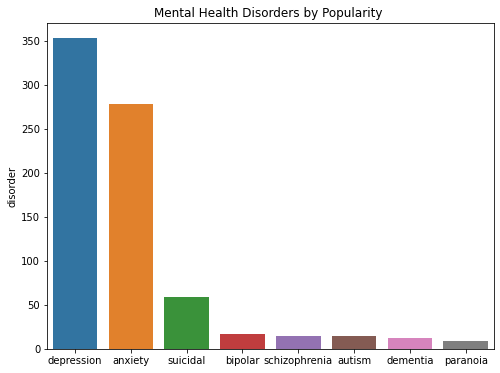

In [134]:
# Plotting the mental health disoders by popularity
x=df['disorder'].value_counts()
print(x)
plt.figure(figsize = (8,6))
plt.title('Mental Health Disorders by Popularity ')
sns.barplot(x.index, x);


According to the hashtags the main mental health issues that kenyans are tweeting about are 
- Depression 
- Anxiety 
- Suicidal ideation 
- Bipolar
- Autism
- Schizophrenia
- Dementia 
- Paranoia 

In [135]:
# Extracting 'hour' data from the 'created_at' column
df['hour'] = df['created_at'].dt.hour
df.head()

,tweet,location,created_at,disorder,hour
0,SHOCK as a young man climbs on top of a hospit...,"Nairobi, Kenya",2021-08-17 10:33:55,depression,10
1,People tend to hide depression under drinking ...,"Nairobi, Kenya",2021-08-17 10:20:30,depression,10
2,@Lily_nganga Depression,Nairobi,2021-08-17 09:32:49,depression,9
3,Itumbi has subjected bloggers in to depression...,"Nairobi, Kenya",2021-08-17 08:56:26,depression,8
4,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",2021-08-17 08:18:20,depression,8


In [136]:
# Checking the number of disorders per hour
df.hour.astype('category').value_counts()


7     70
8     70
9     52
17    51
13    48
11    43
12    41
19    41
10    40
18    39
16    38
14    35
6     29
5     29
15    28
21    23
20    21
4     18
3     13
22     9
2      6
23     5
1      4
0      3
Name: hour, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


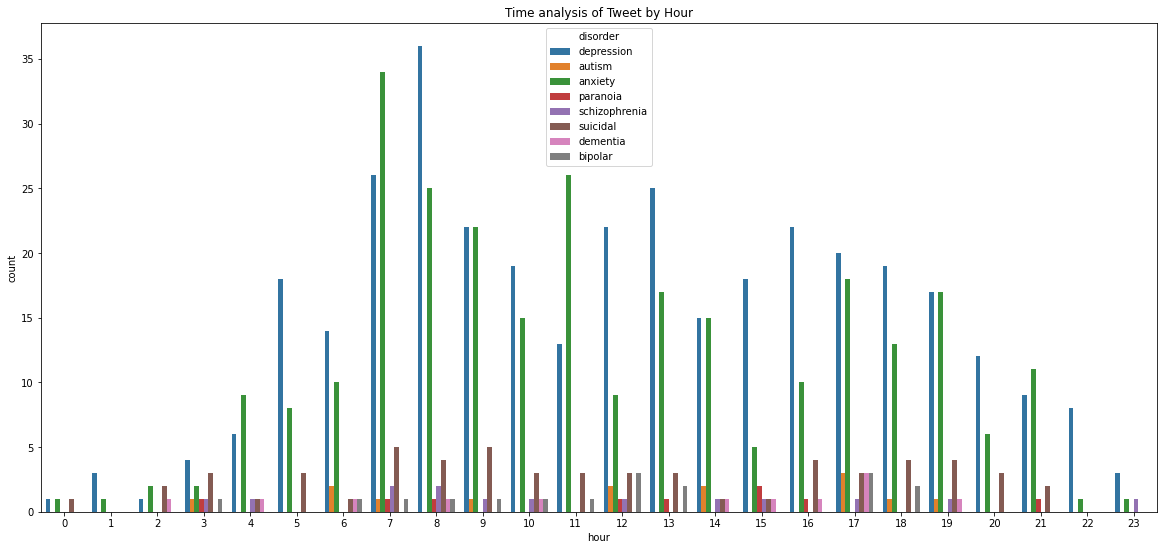

In [137]:
# Creating a plot showing the tweets by the hour of day they were created by the disorder
plt.figure(figsize = (20,9))
plt.title('Time analysis of Tweet by Hour')
x = df.hour

sns.countplot(df.hour.astype('category'), hue = df.disorder )
plt.show()

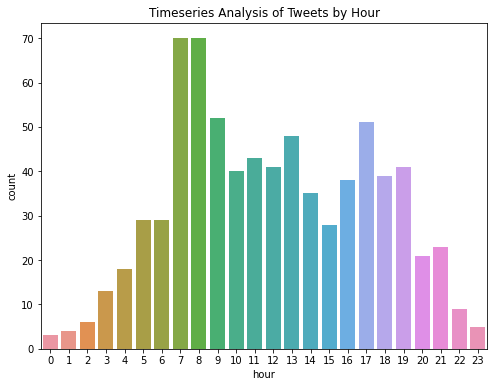

In [138]:
# Creating a plot showing the tweets by the hour of day they were created
plt.figure(figsize=(8,6))
sns.countplot(x = df.hour)
plt.title('Timeseries Analysis of Tweets by Hour')
plt.show()


In [139]:
# Removing the unnecessary column 'created_at' that will not help with classification. 
unnecessary = ['created_at']
df.drop(unnecessary, axis=1, inplace=True)
df.head()

,tweet,location,disorder,hour
0,SHOCK as a young man climbs on top of a hospit...,"Nairobi, Kenya",depression,10
1,People tend to hide depression under drinking ...,"Nairobi, Kenya",depression,10
2,@Lily_nganga Depression,Nairobi,depression,9
3,Itumbi has subjected bloggers in to depression...,"Nairobi, Kenya",depression,8
4,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",depression,8


# Data Pre-processing

In [140]:
# Checking the number of entries available for each disorder
df.disorder.value_counts()

depression       353
anxiety          278
suicidal          59
bipolar           17
schizophrenia     14
autism            14
dementia          12
paranoia           9
Name: disorder, dtype: int64

In [141]:
# We need to LabelEncode the data. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['disorder'] = le.fit_transform(df.disorder)
df.disorder.value_counts()

4    353
0    278
7     59
2     17
6     14
1     14
3     12
5      9
Name: disorder, dtype: int64

- depression  4
- anxiety     0
- suicidal    7
- bipolar     2
- autism      6
- paranoia    5
- dementia    3
- schizophrenia 1 


In [142]:
# Making column values lowercase
df["tweet"] = df["tweet"].str.lower()
df["location"] = df["location"].str.lower()
df

,tweet,location,disorder,hour
0,shock as a young man climbs on top of a hospit...,"nairobi, kenya",4,10
1,people tend to hide depression under drinking ...,"nairobi, kenya",4,10
2,@lily_nganga depression,nairobi,4,9
3,itumbi has subjected bloggers in to depression...,"nairobi, kenya",4,8
4,mental health isn’t just anxiety &amp; depress...,"nairobi, kenya",4,8
...,...,...,...,...
751,"@adenya_e we have the arctic and antarctic, sa...","nairobi, kenya",2,12
752,weather is very bipolar,"nairobi, kenya",2,12
753,@elenanjeru @yvonnegach @shikoohz it is possib...,nairobi,2,3
754,icymi: living with bipolar disorder | #unscrip...,nairobi,2,13


In [143]:
# Removing punctuation
df['tweet'] = df['tweet'].str.replace(r'[^\w\s]+', '')

# Removing words beginning with 'http' 
df['tweet'] = df['tweet'].str.replace('http[^\s]*',"")

In [144]:
# Previewing an entry to check if 'http' has been removed
df['tweet'].iloc[0]

'shock as a young man climbs on top of a hospital building in kahawa wendani and threatens to commit suicide  depre '

In [145]:
# Creating the list of stopwords from our dataset
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

# Adding extra stopwords that we have observed in our data
stop.extend(['https', 'si', 'ni', 'co'])

# Removing stop words
df['clean_tweet'] = df.tweet.str.replace("[^\w\s]", "").str.lower()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

# Tokenize the data
df["clean_tweet_tok"] = df["tweet"].str.lower().str.split()
df['clean_tweet_tok'] = df['clean_tweet_tok'].apply(lambda x: [item for item in x if item not in stop])

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,location,disorder,hour,clean_tweet,clean_tweet_tok
0,shock as a young man climbs on top of a hospit...,"nairobi, kenya",4,10,shock young man climbs top hospital building k...,"[shock, young, man, climbs, top, hospital, bui..."
1,people tend to hide depression under drinking ...,"nairobi, kenya",4,10,people tend hide depression drinking drugs tak...,"[people, tend, hide, depression, drinking, dru..."
2,lily_nganga depression,nairobi,4,9,lily_nganga depression,"[lily_nganga, depression]"
3,itumbi has subjected bloggers in to depression...,"nairobi, kenya",4,8,itumbi subjected bloggers depression ought beh...,"[itumbi, subjected, bloggers, depression, ough..."
4,mental health isnt just anxiety amp depression...,"nairobi, kenya",4,8,mental health isnt anxiety amp depression nagg...,"[mental, health, isnt, anxiety, amp, depressio..."
...,...,...,...,...,...,...
751,adenya_e we have the arctic and antarctic safe...,"nairobi, kenya",2,12,adenya_e arctic antarctic safe say weather cou...,"[adenya_e, arctic, antarctic, safe, say, weath..."
752,weather is very bipolar,"nairobi, kenya",2,12,weather bipolar,"[weather, bipolar]"
753,elenanjeru yvonnegach shikoohz it is possible ...,nairobi,2,3,elenanjeru yvonnegach shikoohz possible societ...,"[elenanjeru, yvonnegach, shikoohz, possible, s..."
754,icymi living with bipolar disorder unscripted...,nairobi,2,13,icymi living bipolar disorder unscriptedwithgr...,"[icymi, living, bipolar, disorder, unscriptedw..."


In [146]:
# Lemmatizing our dataset
# Initialize the lemmatizer
wl = WordNetLemmatizer()

In [147]:
# Dealing with Position tags
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


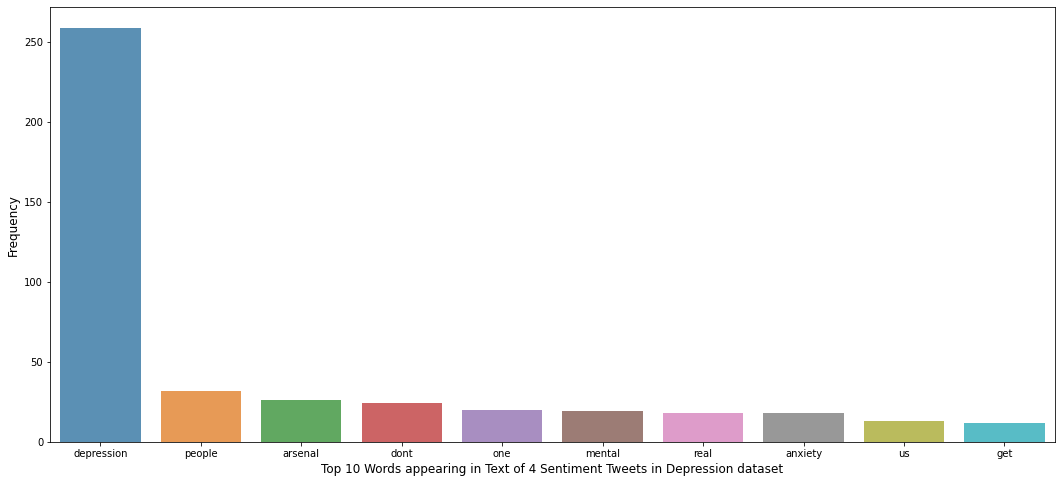

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


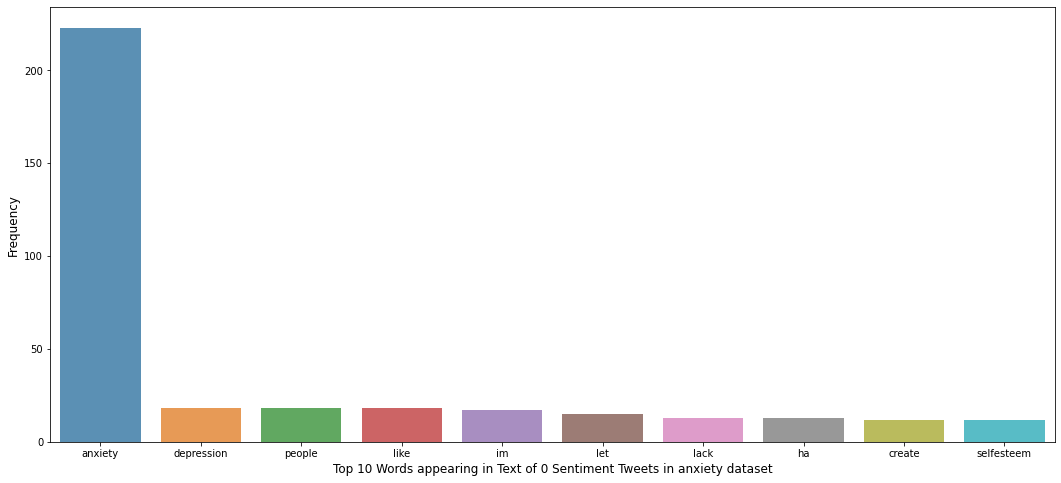

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


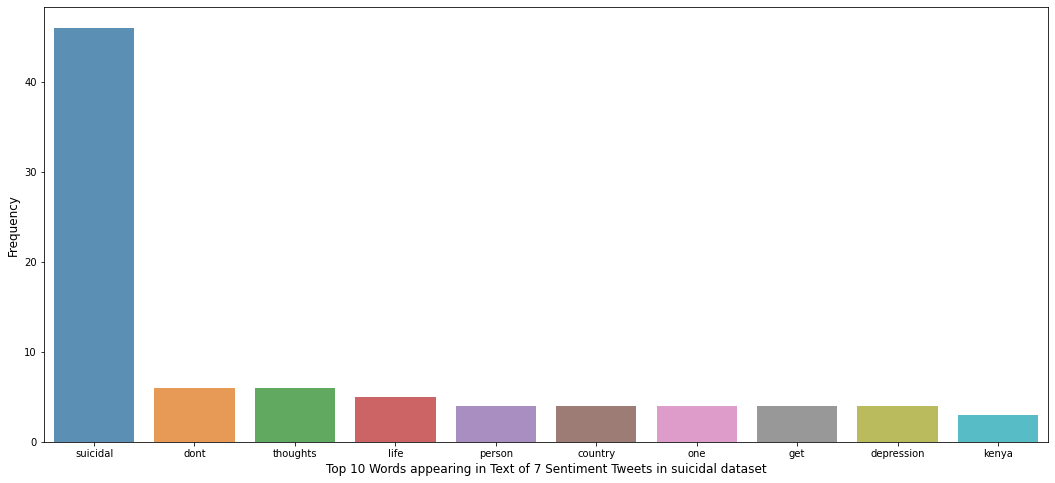

In [161]:
# Creating wordclouds for most popular sentiments
from wordcloud import WordCloud
from textwrap import wrap
eng_stopwords = set(stopwords.words("english"))

mylist = [1]
base = ['Depression', 'anxiety', 'suicidal', 'paranoia', 'schizophrenia', 'dementia','autism','bipolar']

for f in mylist: 
  data=df.disorder.value_counts()
  Analysis_Data = df
  Analysis_Data["clean_tweet"]= Analysis_Data["clean_tweet"].str.lower()#converting the text into lowercase
  Analysis_Data["clean_tweet"] = Analysis_Data["clean_tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng_stopwords)]))#removing the english stopwords
  Analysis_Data["clean_tweet"] = Analysis_Data["clean_tweet"].str.replace('[^\w\s]','')#removing the emojis
  for i in range(0,3):
    Sentiment = Analysis_Data[Analysis_Data['disorder'] == data.index[i]]#Creating the dataframe of having same sentiment
    Word_frequency = pd.Series(' '.join(Sentiment.clean_tweet).split()).value_counts()[:10]#Calculating the words frequency
    plt.figure(figsize=(18,8))
    sns.barplot(Word_frequency.index, Word_frequency.values, alpha=0.8)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Top 10 Words appearing in Text of '+str(data.index[i])+' Sentiment Tweets in '+str(base[i])+' dataset', fontsize=12)
    plt.show()

On ['Depression', 'anxiety', 'suicidal', 'paranoia', 'schizophrenia', 'dementia', 'autism', 'bipolar'] Dataset


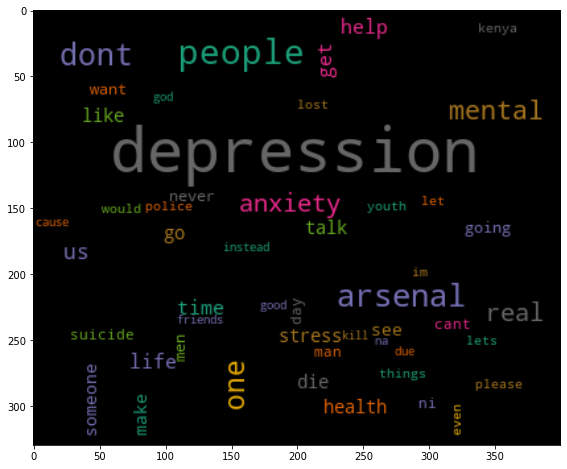

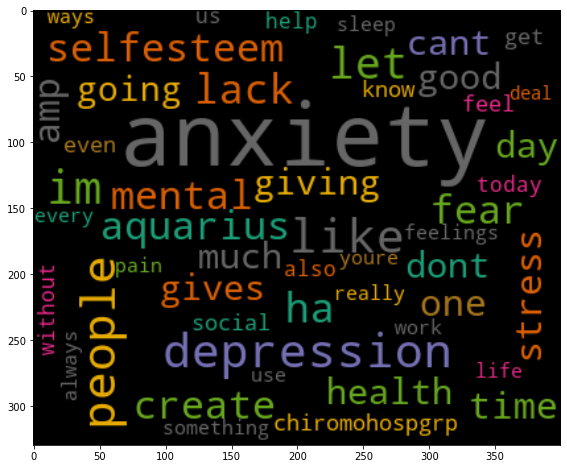

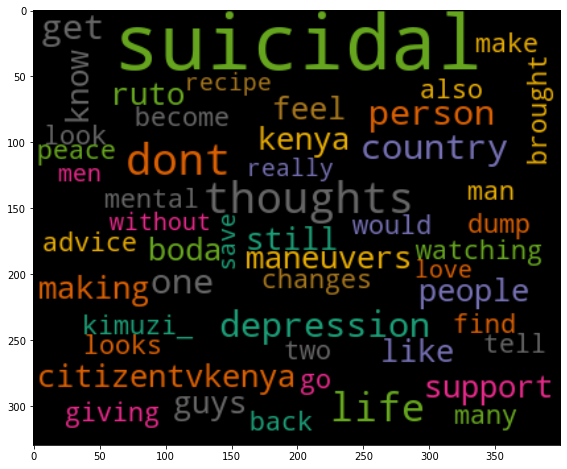

In [162]:
# Looking at the common words present in the tweets for each Sentiment
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.show()
# Plotting word cloud for each Sentiment in each data Sentiment
for f in mylist: 
  df
  data=df.disorder.value_counts()
  print("On "+str(base)+" Dataset")
  for i in range(3):
    Sentiment = Analysis_Data[Analysis_Data['disorder'] == data.index[i]]
    Word_frequency = pd.Series(' '.join(Sentiment.tweet).split()).value_counts()[:50] 
    generate_wordcloud(Word_frequency.sort_values(ascending=False),data.index[i])

In [148]:
# Creating a copy of our dataset
df1 = df.copy(deep=True)
df1.head()

,tweet,location,disorder,hour,clean_tweet,clean_tweet_tok
0,shock as a young man climbs on top of a hospit...,"nairobi, kenya",4,10,shock young man climbs top hospital building k...,"[shock, young, man, climbs, top, hospital, bui..."
1,people tend to hide depression under drinking ...,"nairobi, kenya",4,10,people tend hide depression drinking drugs tak...,"[people, tend, hide, depression, drinking, dru..."
2,lily_nganga depression,nairobi,4,9,lily_nganga depression,"[lily_nganga, depression]"
3,itumbi has subjected bloggers in to depression...,"nairobi, kenya",4,8,itumbi subjected bloggers depression ought beh...,"[itumbi, subjected, bloggers, depression, ough..."
4,mental health isnt just anxiety amp depression...,"nairobi, kenya",4,8,mental health isnt anxiety amp depression nagg...,"[mental, health, isnt, anxiety, amp, depressio..."


In [158]:
# Creating a .CSV file with our cleaned dataset
df.to_csv('MentalHealth.csv')